<a href="https://colab.research.google.com/github/Uzayr-Ch/AI-Labs-Sem-5/blob/main/Penguine_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing data manipulation and visualization libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load from seaborn's built-in dataset
df = sns.load_dataset('penguins')

In [3]:
# Shape of the dataset
print("Shape:", df.shape)

Shape: (344, 7)


In [4]:
# Column names
print("Columns:", df.columns.tolist())

Columns: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


In [6]:
# First few rows
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [7]:
# Basic info about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [8]:
# Descriptive statistics
print(df.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


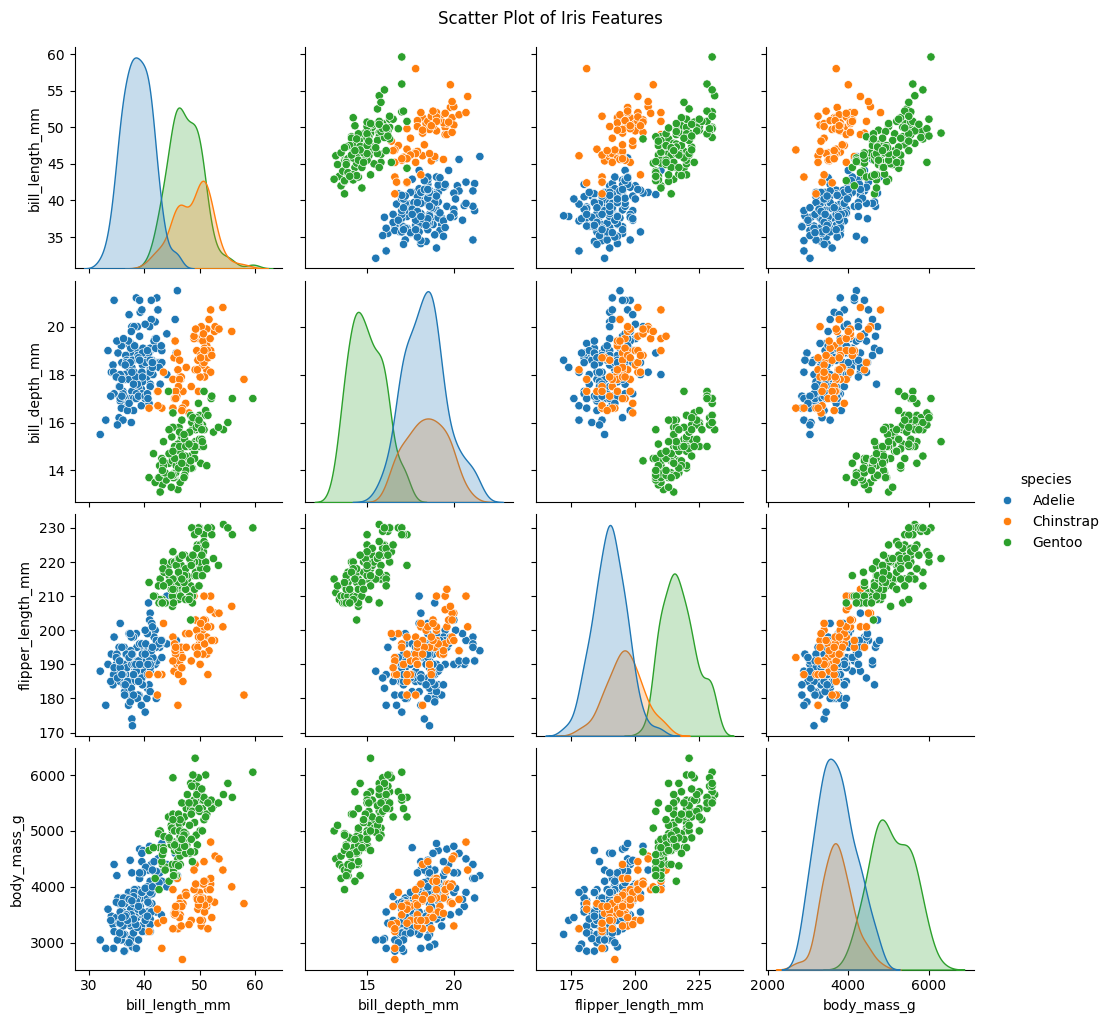

In [9]:
# Scatterpot
sns.pairplot(df, hue="species")
plt.suptitle("Scatter Plot of Iris Features", y=1.02)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


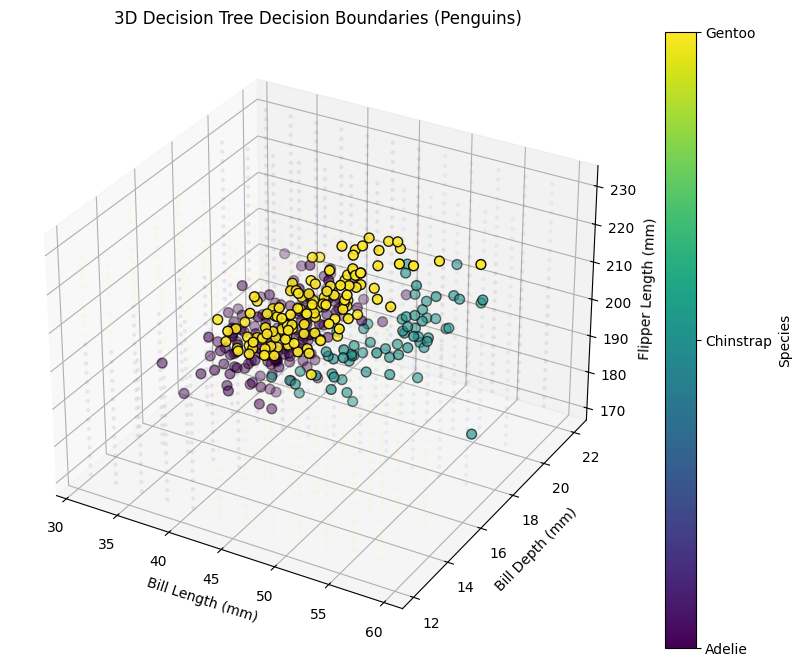

3D Decision Tree Accuracy (on visualization features): 0.988


In [12]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Select three features for 3D visualization (bill_length_mm, bill_depth_mm, and flipper_length_mm)
X_vis_3d = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].dropna()
y_vis_3d = df["species"][X_vis_3d.index] # Ensure species corresponds to the selected rows
le = LabelEncoder()
y_vis_3d_encoded = le.fit_transform(y_vis_3d)

# Train a new decision tree on these 3 features
clf_3d = DecisionTreeClassifier(random_state=42, max_depth=4) # Increased max_depth for better separation
clf_3d.fit(X_vis_3d, y_vis_3d_encoded)

# Create a mesh grid for 3D
x_min, x_max = X_vis_3d.iloc[:, 0].min() - 1, X_vis_3d.iloc[:, 0].max() + 1
y_min, y_max = X_vis_3d.iloc[:, 1].min() - 1, X_vis_3d.iloc[:, 1].max() + 1
z_min, z_max = X_vis_3d.iloc[:, 2].min() - 1, X_vis_3d.iloc[:, 2].max() + 1

# Create a denser meshgrid for better visualization
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5),
                         np.arange(z_min, z_max, 0.5))

# Predict class for each point in the mesh
# Reshape the meshgrid points to be compatible with predict
mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

# Predict in batches to avoid memory issues if necessary, but for this dataset it should be fine
# Need to handle potential NaN values in mesh_points if the range includes them due to min/max calculation
# Let's predict and then reshape
Z = clf_3d.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot decision boundaries by plotting a subsample of the mesh points
# We'll plot the mesh points with colors based on their predicted class
# To avoid plotting too many points, we'll take a subset
step = 5 # Adjust this value to control the density of the boundary points
ax.scatter(xx[::step, ::step, ::step].ravel(),
           yy[::step, ::step, ::step].ravel(),
           zz[::step, ::step, ::step].ravel(),
           c=Z[::step, ::step, ::step].ravel(),
           alpha=0.05,  # Make the boundary points translucent
           cmap='viridis',
           marker='.')


# Plot data points
scatter = ax.scatter(X_vis_3d.iloc[:, 0], X_vis_3d.iloc[:, 1], X_vis_3d.iloc[:, 2],
                     c=y_vis_3d_encoded, cmap='viridis', edgecolors='k', s=50)

# Set labels and title
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.set_zlabel('Flipper Length (mm)')
ax.set_title('3D Decision Tree Decision Boundaries (Penguins)')

# Add color bar
cbar = fig.colorbar(scatter, ticks=[0, 1, 2], label='Species')
cbar.ax.set_yticklabels(le.classes_)


plt.show()

print(f"3D Decision Tree Accuracy (on visualization features): {clf_3d.score(X_vis_3d, y_vis_3d_encoded):.3f}")
# The original 4D decision tree accuracy is not directly comparable here as we are using only 3 features for visualization
# print(f"Original 4D Decision Tree Accuracy: {clf.score(X_test, y_test):.3f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


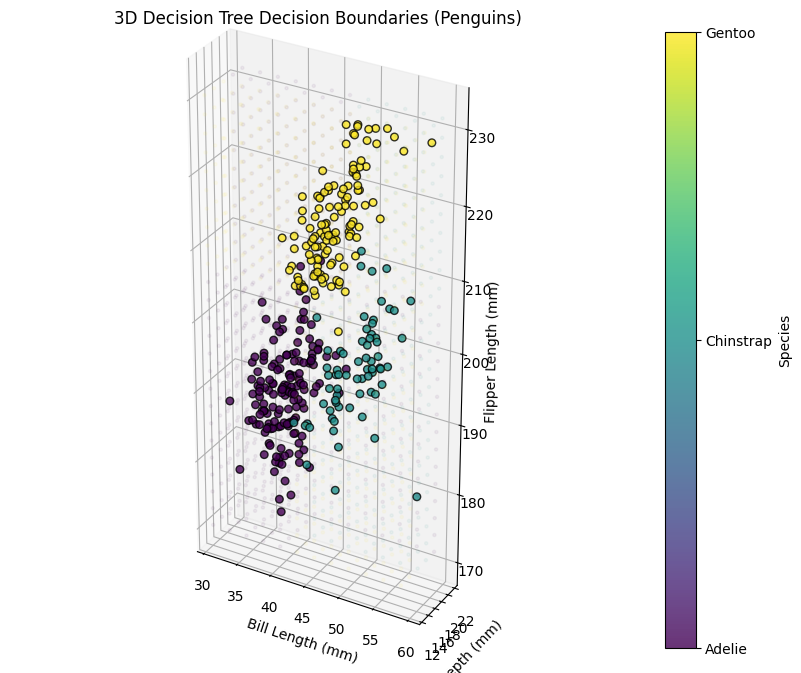

3D Decision Tree Accuracy (on visualization features): 0.988


In [13]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Select three features for 3D visualization (bill_length_mm, bill_depth_mm, and flipper_length_mm)
X_vis_3d = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].dropna()
y_vis_3d = df["species"][X_vis_3d.index] # Ensure species corresponds to the selected rows
le = LabelEncoder()
y_vis_3d_encoded = le.fit_transform(y_vis_3d)


# Train a new decision tree on these 3 features
clf_3d = DecisionTreeClassifier(random_state=42, max_depth=4) # Increased max_depth for better separation
clf_3d.fit(X_vis_3d, y_vis_3d_encoded)

# Create a mesh grid for 3D
x_min, x_max = X_vis_3d.iloc[:, 0].min() - 1, X_vis_3d.iloc[:, 0].max() + 1
y_min, y_max = X_vis_3d.iloc[:, 1].min() - 1, X_vis_3d.iloc[:, 1].max() + 1
z_min, z_max = X_vis_3d.iloc[:, 2].min() - 1, X_vis_3d.iloc[:, 2].max() + 1

# Create a denser meshgrid for better visualization
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5),
                         np.arange(z_min, z_max, 0.5))

# Predict class for each point in the mesh
# Reshape the meshgrid points to be compatible with predict
mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

# Predict in batches to avoid memory issues if necessary, but for this dataset it should be fine
# Need to handle potential NaN values in mesh_points if the range includes them due to min/max calculation
# Let's predict and then reshape
Z = clf_3d.predict(mesh_points)
Z = Z.reshape(xx.shape)


# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot decision boundaries by plotting a subsample of the mesh points
# We'll plot the mesh points with colors based on their predicted class
# To avoid plotting too many points, we'll take a subset
step = 5 # Adjust this value to control the density of the boundary points
ax.scatter(xx[::step, ::step, ::step].ravel(),
           yy[::step, ::step, ::step].ravel(),
           zz[::step, ::step, ::step].ravel(),
           c=Z[::step, ::step, ::step].ravel(),
           alpha=0.05,  # Make the boundary points translucent
           cmap='viridis',
           marker='.')


# Plot data points with adjusted marker size and transparency
scatter = ax.scatter(X_vis_3d.iloc[:, 0], X_vis_3d.iloc[:, 1], X_vis_3d.iloc[:, 2],
                     c=y_vis_3d_encoded, cmap='viridis', edgecolors='k', s=30, alpha=0.8) # Reduced marker size and added transparency


# Set labels and title
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.set_zlabel('Flipper Length (mm)')
ax.set_title('3D Decision Tree Decision Boundaries (Penguins)')

# Add color bar
cbar = fig.colorbar(scatter, ticks=[0, 1, 2], label='Species')
cbar.ax.set_yticklabels(le.classes_)

# Set equal aspect ratio (this might not work perfectly in all 3D plots but can help)
ax.set_box_aspect([np.ptp(X_vis_3d.iloc[:, 0]), np.ptp(X_vis_3d.iloc[:, 1]), np.ptp(X_vis_3d.iloc[:, 2])])


plt.show()

print(f"3D Decision Tree Accuracy (on visualization features): {clf_3d.score(X_vis_3d, y_vis_3d_encoded):.3f}")
# The original 4D decision tree accuracy is not directly comparable here as we are using only 3 features for visualization
# print(f"Original 4D Decision Tree Accuracy: {clf.score(X_test, y_test):.3f}")

In [14]:
# Importing Libraries for Model Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
# Features and target
X = df.drop("species", axis=1)
y = df["species"]

# Handle missing values by dropping rows with any missing values
X = X.dropna()
y = y[X.index] # Ensure y corresponds to the selected rows

# Encode categorical features using one-hot encoding
X = pd.get_dummies(X, columns=["island", "sex"], drop_first=True)


# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

Accuracy: 0.9552238805970149

Classification Report:
               precision    recall  f1-score   support

      Adelie       0.93      0.97      0.95        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.96        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.96      0.96      0.96        67



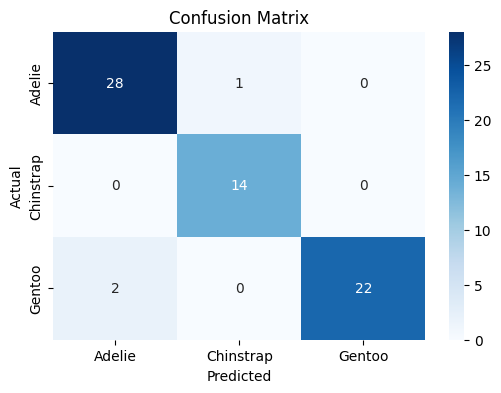

In [18]:
# Train Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

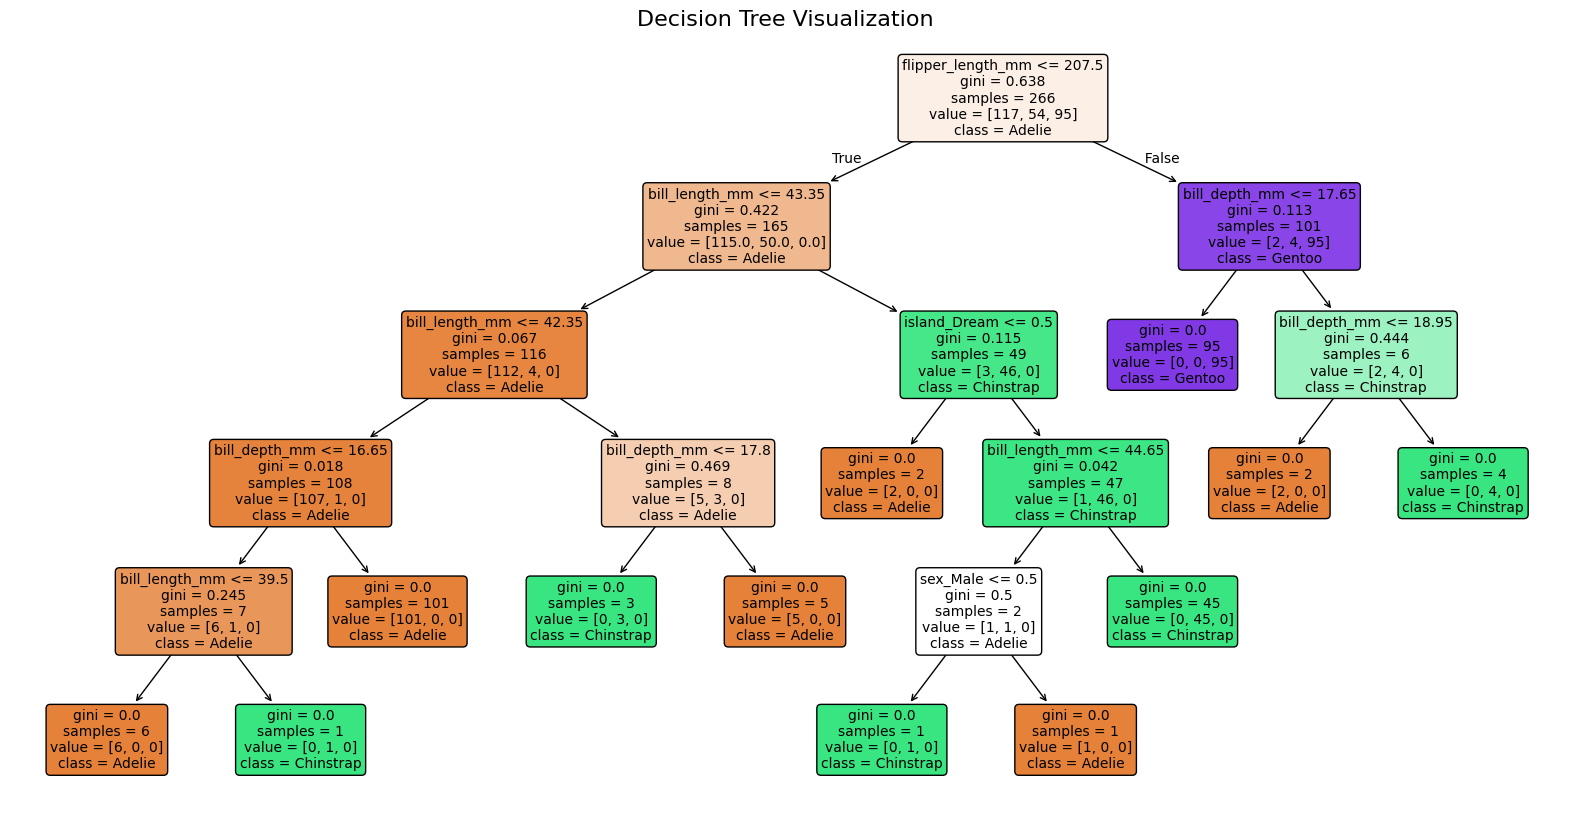

Decision Tree Rules:
|--- flipper_length_mm <= 207.50
|   |--- bill_length_mm <= 43.35
|   |   |--- bill_length_mm <= 42.35
|   |   |   |--- bill_depth_mm <= 16.65
|   |   |   |   |--- bill_length_mm <= 39.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bill_length_mm >  39.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- bill_depth_mm >  16.65
|   |   |   |   |--- class: 0
|   |   |--- bill_length_mm >  42.35
|   |   |   |--- bill_depth_mm <= 17.80
|   |   |   |   |--- class: 1
|   |   |   |--- bill_depth_mm >  17.80
|   |   |   |   |--- class: 0
|   |--- bill_length_mm >  43.35
|   |   |--- island_Dream <= 0.50
|   |   |   |--- class: 0
|   |   |--- island_Dream >  0.50
|   |   |   |--- bill_length_mm <= 44.65
|   |   |   |   |--- sex_Male <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sex_Male >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- bill_length_mm >  44.65
|   |   |   |   |--- class: 1
|--- flipper_length_mm >  207.50
|   |--- bill_d

In [19]:
# Visualize the Decision Tree Structure
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# Print text representation of the tree
print("Decision Tree Rules:")
print("=" * 50)
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


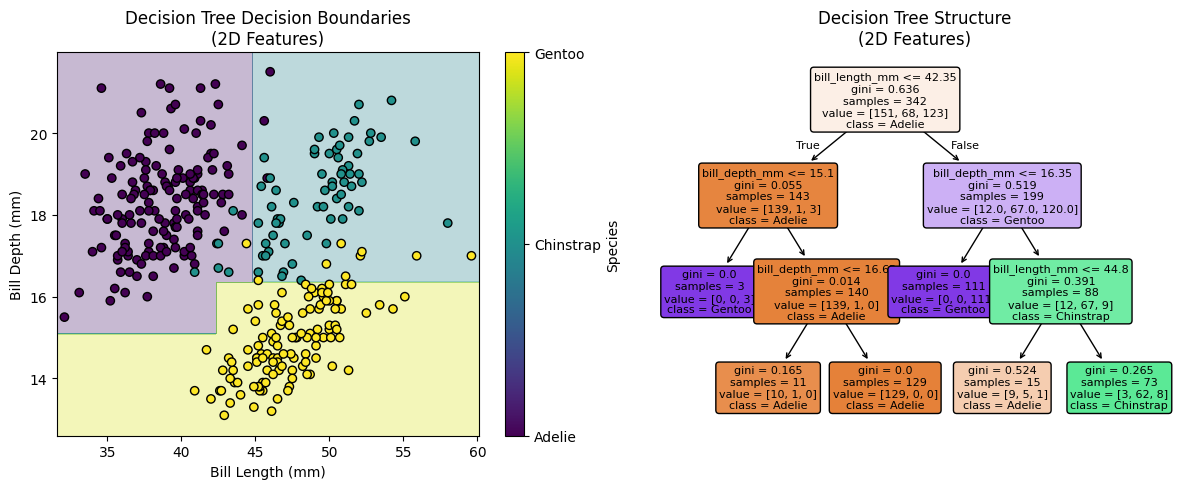

2D Decision Tree Accuracy: 0.947


In [21]:
# Decision Tree Decision Boundaries Visualization
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Select two features for 2D visualization (bill_length_mm and bill_depth_mm)
X_vis = df[["bill_length_mm", "bill_depth_mm"]].dropna()
y_vis = df["species"][X_vis.index] # Ensure y corresponds to the selected rows

# Encode labels
le = LabelEncoder()
y_vis_encoded = le.fit_transform(y_vis)


# Train a new decision tree on just these 2 features
clf_2d = DecisionTreeClassifier(random_state=42, max_depth=3)
clf_2d.fit(X_vis, y_vis_encoded)

# Create a mesh grid
x_min, x_max = X_vis.iloc[:, 0].min() - 0.5, X_vis.iloc[:, 0].max() + 0.5
y_min, y_max = X_vis.iloc[:, 1].min() - 0.5, X_vis.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(12, 5))

# First subplot: Decision boundaries
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis_encoded, cmap='viridis', edgecolors='black')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Decision Tree Decision Boundaries\n(2D Features)')
cbar = plt.colorbar(scatter, ticks=[0, 1, 2], label='Species')
cbar.ax.set_yticklabels(le.classes_)


# Second subplot: The 2D decision tree structure
plt.subplot(1, 2, 2)
plot_tree(clf_2d,
          feature_names=['bill_length_mm', 'bill_depth_mm'],
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=8)
plt.title('Decision Tree Structure\n(2D Features)')

plt.tight_layout()
plt.show()

print(f"2D Decision Tree Accuracy: {clf_2d.score(X_vis, y_vis_encoded):.3f}")
# The original 4D decision tree accuracy is not directly comparable here as we are using only 2 features for visualization
# print(f"Original 4D Decision Tree Accuracy: {clf.score(X_test, y_test):.3f}")